In [2]:
import pandas             as pd
import numpy              as np
import pylab              as pl
from   scipy.spatial      import Delaunay
from   scipy.spatial      import KDTree
from   astropy.table      import Table

In [ ]:
params = {'legend.fontsize': '20',
          'figure.figsize': (10, 10),
         'axes.labelsize': '20',
         'axes.titlesize':'20',
         'xtick.labelsize':'20',
         'ytick.labelsize':'20'}
pl.rcParams.update(params)

In [47]:
rng = np.random.default_rng()
points1 = rng.random((30, 2))

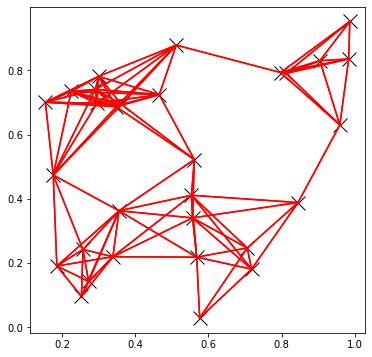

In [48]:
pl.figure(figsize=(6, 6))
pl.plot(points1[:, 0], points1[:, 1], "xk", markersize=14)

kd_tree1 = KDTree(points1)
indexes = kd_tree1.query_ball_tree(kd_tree1, r=0.3)

for i in range(len(indexes)):
    for j in indexes[i]:
        pl.plot([points1[i, 0], points1[j, 0]],[points1[i, 1], points1[j, 1]], "-r")
pl.show()

In [49]:
indexes

[[0, 5, 7, 9, 19, 26, 29],
 [1, 4, 9, 10, 19, 22, 23, 28],
 [2, 3, 6, 8, 25, 27],
 [2, 3, 6, 8, 21, 25, 27],
 [1, 4, 9, 10, 19, 21, 22, 23, 26, 28],
 [0, 5, 7, 14, 16, 17, 18, 24, 29],
 [2, 3, 6, 8, 25, 27],
 [0, 5, 7, 14, 16, 17, 18, 24, 29],
 [2, 3, 6, 8, 25, 27],
 [0, 1, 4, 9, 10, 19, 21, 22, 23, 26, 28],
 [1, 4, 9, 10, 19, 21, 22, 23, 26, 28],
 [11, 12, 15, 16, 20, 23, 29],
 [11, 12, 15, 16, 20, 29],
 [13, 17, 18, 24],
 [5, 7, 14, 17, 18, 27],
 [11, 12, 15, 16, 20, 23, 29],
 [5, 7, 11, 12, 15, 16, 20, 24, 29],
 [5, 7, 13, 14, 17, 18, 24],
 [5, 7, 13, 14, 17, 18, 24],
 [0, 1, 4, 9, 10, 19, 21, 22, 23, 26, 28],
 [11, 12, 15, 16, 20, 29],
 [3, 4, 9, 10, 19, 21, 26, 28],
 [1, 4, 9, 10, 19, 22, 23, 26, 28],
 [1, 4, 9, 10, 11, 15, 19, 22, 23, 29],
 [5, 7, 13, 16, 17, 18, 24, 29],
 [2, 3, 6, 8, 25],
 [0, 4, 9, 10, 19, 21, 22, 26, 28],
 [2, 3, 6, 8, 14, 27],
 [1, 4, 9, 10, 19, 21, 22, 26, 28],
 [0, 5, 7, 11, 12, 15, 16, 20, 23, 24, 29]]

In [50]:
kdtree = np.array([ np.array([np.array(i), len(i)], dtype=object)  for i in indexes])

In [52]:
# kdtree

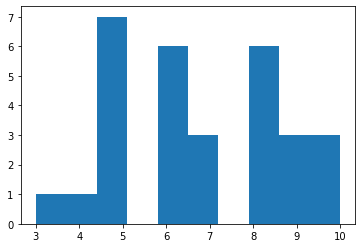

In [53]:
_ = pl.hist(kdtree[:,1]-1)

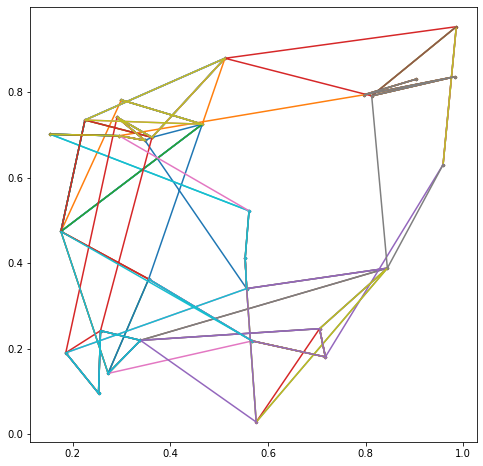

In [54]:
fig = pl.figure(figsize=(8,8))
for i in kdtree:
    pl.scatter(points1[:,0][i[0]], points1[:,1][i[0]], s=5)
    pl.plot(points1[:,0][i[0]], points1[:,1][i[0]])
pl.show()

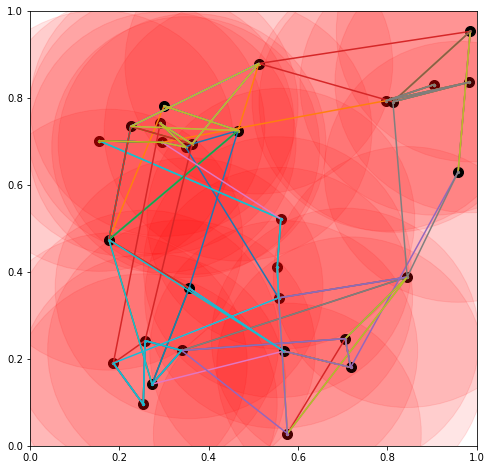

In [73]:
fig, ax = pl.subplots(1,1,figsize=(8,8))
for k, i in enumerate(kdtree):
    circle = pl.Circle((points1[:,0][k], points1[:,1][k]), 0.3, color='r', alpha=0.1)
    ax.add_patch(circle)
    pl.scatter(points1[:,0][k], points1[:,1][k], c='black', s=100)    
    pl.scatter(points1[:,0][i[0]], points1[:,1][i[0]], s=5)
    pl.plot(points1[:,0][i[0]], points1[:,1][i[0]])
    pl.xlim(0,1)
    pl.ylim(0,1)
pl.show()